## Experiment 6 - Removing lakes from the simulation
### Background
In the NWM channel routing configuration, WRF-Hydro can be run with lakes on or off because the network sees them as objects. Note: in the gridded simulation it is not as simple as flipping a switch because if lakes are to be included, then they need to be represented explicitly on the fine grid (i.e. in the `Fulldom_hires.nc` file).  
The only modification needed between running with and without lakes is to edit the `hydro.namelist`. See below for details.

### Objective
Run a simulation for the NWM configuration without representing lakes and compare the resulting hydrographs at the outlet gage.

In [29]:
%%bash
mkdir -p ~/GLERL_Training/output/lesson6/turn_lakes_off
# Set up a new directory for our new simulation
cp -r ~/GLERL_Training/run_NWM_template/* \
~/GLERL_Training/output/lesson6/turn_lakes_off


**Next, run the simulation**


In [30]:
%%bash
cd ~/GLERL_Training/output/lesson6/turn_lakes_off
mpirun -np 2 ./wrf_hydro.exe >> run.log 2>&1

In [31]:
# Load the xarray package
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
chanobs_baseline = xr.open_mfdataset('/glade/u/home/lread/GLERL_Training/run_NWM_baseline/*CHANOBS*',
                            concat_dim='time')
chanobs_lakes_off = xr.open_mfdataset('/glade/u/home/lread/GLERL_Training/output/lesson6/turn_lakes_off/*CHANOBS*',
                            concat_dim='time')
obs = pd.read_csv('/glade/u/home/lread/GLERL_Training/run_NWM_baseline/USGS_obs.csv',dtype=str)
obs['dateTime'] = pd.to_datetime(obs['dateTime'])
obs['streamflow_cms'] = pd.to_numeric(obs['streamflow_cms'])

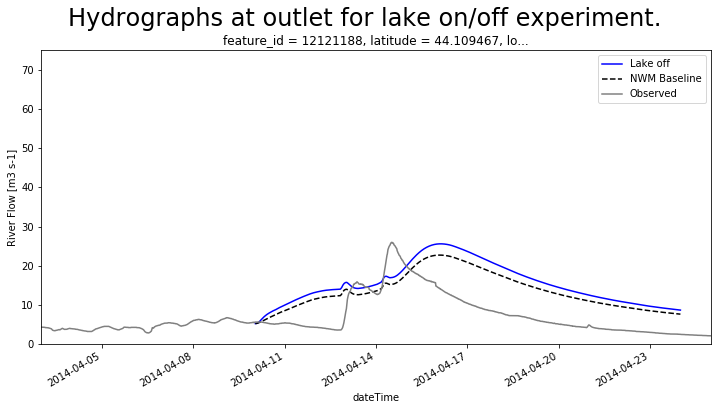

In [49]:
fig, axes = plt.subplots(ncols=1,figsize=(12, 6))
plt.suptitle('Hydrographs at outlet for lake on/off experiment.',fontsize=24)
chanobs_lakes_off.sel(feature_id = 12121188).streamflow.plot(label='Lake off',
                                                        color='blue',
                                                        linestyle='-')
chanobs_baseline.sel(feature_id = 12121188).streamflow.plot(label='NWM Baseline',
                                                        color='black',
                                                        linestyle='--')
obs[obs['site_no'] == '04124500'].plot(x='dateTime',
                                         y='streamflow_cms',
                                         ax=axes,
                                         label='Observed',
                                         color='grey')
plt.ylim(0,75)
plt.legend()
plt.show()